In [247]:
import networkx as nx
import matplotlib.pyplot as plt
from sage.all import *
import os

In [248]:
IGNORE_VERTEX = 65536

In [249]:
with open(os.path.join('adjacency_lists', '4-5-cage.txt'), 'r') as f:
    lines = f.readlines()
    num_vertices, num_edges = map(int, lines.pop(0).strip().split(' '))
    adjacency_list = [set() for _ in range(num_vertices)]
    min_number = min(map(int, " ".join(lines).split()))
    print(min_number)
    for v, line in enumerate(lines):
        neighbors = map(int, line.strip().split(' '))
        for u in neighbors:
            if u == IGNORE_VERTEX:
                continue
            adjacency_list[v].add(u - min_number)
            adjacency_list[u - min_number].add(v)
    print(adjacency_list)

0
[{1, 2, 3, 4}, {0, 5, 6, 7}, {0, 8, 10, 9}, {0, 11, 12, 13}, {0, 16, 14, 15}, {8, 1, 11, 14}, {1, 12, 9, 15}, {16, 1, 10, 13}, {16, 2, 12, 5}, {17, 2, 13, 6}, {2, 18, 15, 7}, {17, 3, 5, 15}, {8, 18, 3, 6}, {9, 3, 14, 7}, {13, 18, 4, 5}, {10, 11, 4, 6}, {8, 17, 4, 7}, {16, 9, 18, 11}, {17, 10, 12, 14}]


[[0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0], [0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], [0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0], [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

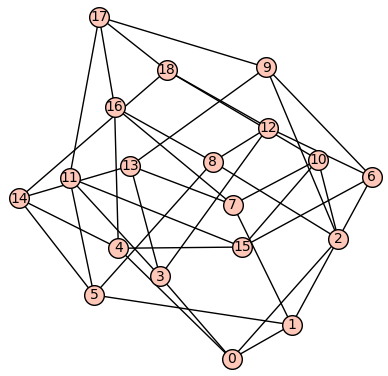

In [250]:
adjacency_matrix = [ [0 for i in range(num_vertices)] for j in range(num_vertices)]
for i in range(num_vertices):
    for j in adjacency_list[i]:
        adjacency_matrix[i][j] = 1
        adjacency_matrix[j][i] = 1
print(adjacency_matrix)

# load into sagemath and calculate the genus
g = Graph(matrix(adjacency_matrix), format='adjacency_matrix')
g.show()

In [251]:
solution = [
    [0, 1, 5, 8, 2, 0], 
    [0, 2, 9, 13, 3, 0], 
    [0, 3, 11, 15, 4, 0], 
    [0, 4, 16, 7, 1, 0], 
    [3, 12, 8, 5, 11, 3], 
    [8, 12, 18, 17, 16, 8], 
    [1, 7, 10, 18, 12, 6, 1],
    [2, 10, 15, 11, 17, 9, 2], 
    [6, 15, 10, 7, 13, 9, 6],
    [1, 6, 9, 17, 18, 14, 5, 1], 
    [2, 8, 16, 4, 14, 18, 10, 2], 
    [3, 13, 14, 4, 15, 6, 12, 3], 
    [5, 14, 13, 7, 16, 17, 11, 5], 
]
# solution = [[x - 1 for x in y] for y in solution] # convert 1-indexed to 0-indexed

In [252]:
len(solution)

13

In [253]:
cycles = [ c for c in g.to_directed().all_simple_cycles(max_length=max(map(len, solution))) ]
print(len(cycles))

1334


In [254]:
# only valid cycles and no duplicates edges
edges = set()
for c in solution:
    for i in range(len(c) - 1):
        assert (c[i], c[i + 1]) not in edges, "Duplicate edge " + str(c[i]) + " " + str(c[i + 1])
        edges.add((c[i], c[i + 1]))
    assert c in cycles

In [255]:
# print cycles with the same vertex set in the solution
for i, c1 in enumerate(solution):
    for j, c2 in enumerate(solution):
        if i == j:
            continue
        if list(reversed(c1)) == c2:
            continue
        assert set(c1) != set(c2), "Duplicate cycles " + str(c1) + " " + str(c2)

In [256]:
def x_in_y(query, base):
    try:
        l = len(query)
    except TypeError:
        l = 1
        query = type(base)((query,))

    for i in range(len(base)):
        if base[i:i+l] == query:
            return True
    return False

# test cases 
assert x_in_y((1, 2, 3), (1, 2, 3, 4))
assert x_in_y((1, 2, 3), (4, 1, 2, 3))
assert not x_in_y((1, 2, 3), (1, 2, 4, 3))
assert x_in_y([0, 61, 60], [0, 61, 60, 59, 42, 41, 40, 39, 68, 69, 0])

In [257]:
# make sure if vertices i, j, k occur in the solution, k, j, i don't
for c in solution:
    c = c.copy() + [c[1]]
    for i in range(len(c) - 2):
        for c2 in solution:
            c2 = c2.copy() + [c2[1]]
            assert not x_in_y([c[i + 2], c[i + 1], c[i]], c2), "Found " + str(c[i]) + " " + str(c[i + 1]) + " " + str(c[i + 2]) + " in " + str(c2)

In [258]:
vertex_uses = g.degree_sequence()
for c in solution:
    for v in c[:-1]:
        vertex_uses[v] -= 1
print("Missing vertex uses:", vertex_uses)
assert all([v == 0 for v in vertex_uses]), "All vertices should be used fully"

Missing vertex uses: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [259]:
# convert edges list to adjacency list
al = [[] for _ in range(g.num_verts())]
for e in g.edges():
    al[e[0]].append(e[1])
    al[e[1]].append(e[0])

# check if every edge is used exactly once by removing them from the adjacency list
for c in solution:
    for i in range(len(c) - 1):
        assert c[i + 1] in al[c[i]], "Edge " + str(c[i]) + " " + str(c[i + 1]) + " not in adjacency list"
        al[c[i]].remove(c[i + 1])
assert all([len(v) == 0 for v in al]), "All edges should be used exactly once"

In [260]:
# verify the rotation system (sorted adjacency list)
adj = [[] for _ in range(num_vertices)]
pairs = [[] for _ in range(num_vertices)]
for c in solution:
    ce = c[:-1]
    for i in range(len(c) - 1):
        pairs[c[i]].append((ce[i - 1], c[i + 1]))
print(pairs)
for i, p in enumerate(pairs):
    u, v = p.pop(0)
    s = u
    adj[i].append(u)
    while v != s:
        adj[i].append(v)
        u, v = list(filter(lambda x: x[0] == v, p))[0]
        p.remove((u, v))
    assert len(p) == 0, "Invalid rotation system"
print(adj)
print("Rotation system is valid")

[[(2, 1), (3, 2), (4, 3), (1, 4)], [(0, 5), (7, 0), (6, 7), (5, 6)], [(8, 0), (0, 9), (9, 10), (10, 8)], [(13, 0), (0, 11), (11, 12), (12, 13)], [(15, 0), (0, 16), (16, 14), (14, 15)], [(1, 8), (8, 11), (14, 1), (11, 14)], [(12, 1), (9, 15), (1, 9), (15, 12)], [(16, 1), (1, 10), (10, 13), (13, 16)], [(5, 2), (12, 5), (16, 12), (2, 16)], [(2, 13), (17, 2), (13, 6), (6, 17)], [(7, 18), (2, 15), (15, 7), (18, 2)], [(3, 15), (5, 3), (15, 17), (17, 5)], [(3, 8), (8, 18), (18, 6), (6, 3)], [(9, 3), (7, 9), (3, 14), (14, 7)], [(18, 5), (4, 18), (13, 4), (5, 13)], [(11, 4), (10, 11), (6, 10), (4, 6)], [(4, 7), (17, 8), (8, 4), (7, 17)], [(18, 16), (11, 9), (9, 18), (16, 11)], [(12, 17), (10, 12), (17, 14), (14, 10)]]
[[2, 1, 4, 3], [0, 5, 6, 7], [8, 0, 9, 10], [13, 0, 11, 12], [15, 0, 16, 14], [1, 8, 11, 14], [12, 1, 9, 15], [16, 1, 10, 13], [5, 2, 16, 12], [2, 13, 6, 17], [7, 18, 2, 15], [3, 15, 17, 5], [3, 8, 18, 6], [9, 3, 14, 7], [18, 5, 13, 4], [11, 4, 6, 10], [4, 7, 17, 8], [18, 16, 11, 

In [261]:
assert False, "Proceed to visually inspect the solution"

AssertionError: Proceed to visually inspect the solution

In [ ]:
g_directed = g.to_directed()

def is_in_cycle(e, cycle):
    try:
        i = cycle.index(e[0])
        j = cycle.index(e[1])

        if i + 1 == j or (i == len(cycle) - 2 and j == 0):
            return True
        else:
            return False
    except ValueError:
        return False

for e in g_directed.edges():
    g_directed.set_edge_label(e[0], e[1], 0)
    for i, c in enumerate(solution):
        if is_in_cycle(e, c):
            g_directed.set_edge_label(e[0], e[1], i + 1)

p = g_directed.plot(
    edge_colors=g_directed._color_by_label({
        0: "black", 
        1: "blue", 
        2: "purple", 
        3: "red", 
        4: "green", 
        5: "orange", 
        6: "yellow",
        7: "brown",
        8: "pink",
        9: "cyan",
        10: "magenta",
        11: "grey",
        12: "lightblue",
        13: "lightgreen",
        14: "teal",
        15: 'salmon',
        16: 'navy',
        17: 'gold',
        18: 'lime',
        19: 'indigo',
        20: 'maroon',
        21: 'olive',
    }), 
    vertex_size=70,
    vertex_color="midnightblue",
    transparent=True,
)
for object in p._objects:
    if isinstance(object, sage.plot.text.Text):
        object._options['rgbcolor'] = (1, 1, 1)
p.show(figsize=(10, 10))

# export as PDF
# p.save("Johnson5-2_Genus1Embedding.pdf", figsize=(14, 14))

In [ ]:
g_directed.layout()
pos = g_directed.get_pos()
for i, c in enumerate(solution):
    for e in g_directed.edges():
        g_directed.set_edge_label(e[0], e[1], 0)
        if is_in_cycle(e, c):
            g_directed.set_edge_label(e[0], e[1], i + 1)

    g_directed.set_pos(pos)

    p = g_directed.plot(
        edge_colors=g_directed._color_by_label({
            0: "black", 
            1: "blue", 
            2: "purple", 
            3: "red", 
            4: "green", 
            5: "orange", 
            6: "yellow",
            7: "brown",
            8: "pink",
            9: "cyan",
            10: "magenta",
            11: "grey",
            12: "lightblue",
            13: "lightgreen",
            14: "teal",
            15: 'salmon',
            16: 'navy',
            17: 'gold',
            18: 'lime',
            19: 'indigo',
            20: 'maroon',
            21: 'olive',
        }), 
        vertex_size=70,
        vertex_color="midnightblue",
        transparent=True,
        pos=pos,
        layout='circular',
    )
    for object in p._objects:
        if isinstance(object, sage.plot.text.Text):
            object._options['rgbcolor'] = (1, 1, 1)
    p.show(figsize=(10, 10))